### Explore [SocialSecurityNamesAllYears](https://github.com/benkaan001/pandas_and_beyond/blob/main/generate_data/02_create_dataset_with_wget.ipynb) dataset created earlier using `wget` and `zipfile` libraries.

- 1. Explore matplotlib `styles` and `colors`.
- 2. Create a df using `read_csv` method.
- 3. Explore and plot unique naming trends between 1880 and 2021.
- 4. Run and plot queries to observe the trends for a given name.
- 5. Create a `function` to visualize query results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1. Explore matplotlib `styles` and `colors`.

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# set style
plt.style.use('fivethirtyeight')

- [link](https://matplotlib.org/stable/gallery/color/named_colors.html) for visual color map of available built-in color pallete.

In [6]:
# import to explore available colors
import matplotlib.colors as mcolors 
mcolors.CSS4_COLORS 

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

## 2. Create a df using `read_csv` method.


In [14]:
df = pd.read_csv('../generate_data/data/SocialSecurityNamesAllYears.csv')

df.shape

(2052781, 4)

In [15]:
df.columns

Index(['Name', 'Sex', 'Count', 'Year'], dtype='object')

In [16]:
df.dtypes

Name     object
Sex      object
Count     int64
Year      int64
dtype: object

## 3. Explore and plot unique naming trends between 1880 and 2021.


In [17]:
# check total number of unique names registered in each year
df['Year'].value_counts()

2008    35088
2007    34965
2009    34722
2006    34097
2010    34089
        ...  
1885     2294
1882     2127
1883     2084
1880     2000
1881     1934
Name: Year, Length: 142, dtype: int64

In [18]:
# sort the unique names by ascending year order
df['Year'].value_counts().sort_index()

1880     2000
1881     1934
1882     2127
1883     2084
1884     2297
        ...  
2017    32648
2018    32196
2019    32073
2020    31453
2021    31537
Name: Year, Length: 142, dtype: int64

- Plot the `unique name count` per year.

<AxesSubplot:>

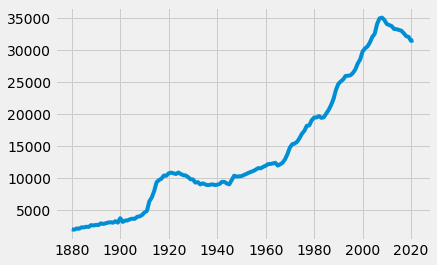

In [21]:
df['Year'].value_counts() \
        .sort_index() \
        .plot()


- Add `title` and `labels`, and adjsut `line width`.

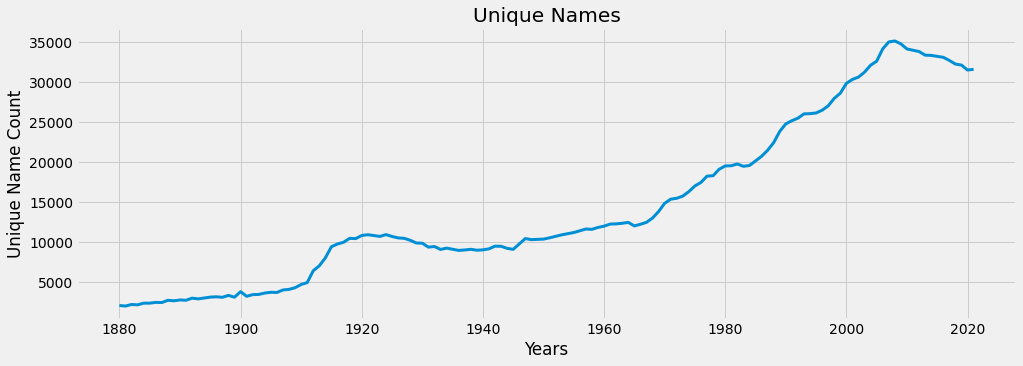

In [28]:
ax = df['Year'].value_counts() \
        .sort_index() \
        .plot(figsize=(15,5), 
                title='Unique Names', 
                lw=3)

ax.set_xlabel('Years')
ax.set_ylabel('Unique Name Count')

plt.show()

## 4. Run and plot queries to observe the trends for a given name.


## 5. Create a `function` to visualize query results.